In [ ]:
import pandas as pd
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt

data = '''
Fever,Cough,Breath ingissues,Infected
NO,NO,NO,NO
YES,YES,YES,YES
YES,YES,NO,NO
YES,NO,YES,YES
YES,YES,YES,YES
NO,YES,NO,NO
YES,NO,YES,YES
YES,NO,YES,YES
NO,YES,YES,YES
YES,YES,NO,YES
NO,YES,NO,NO
NO,YES,YES,YES
NO,YES,YES,NO
YES,YES,NO,NO
'''

def run(model, isBagging = False):
    df = pd.read_csv(StringIO(data), delimiter=',')
    df = df.replace(to_replace=['YES', 'NO'], value=['1', '0'])
    df = df.sample(frac=1) # shuffle -> fixes boosting errors

    X = df.drop('Infected',axis=1)
    y = df[['Infected']]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 1)
    if isBagging:
        model.fit(X_train, y_train)
    else:
        model.fit(X_train, y_train['Infected']) #Random Forest and Boosting
    y_predict = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)
    print('Accuracy: {:.2f}%'.format(accuracy))
    return accuracy, X_test, y_test

In [ ]:
#Bagging
print('\nBagging:')
model = DecisionTreeClassifier(random_state = 1)
_, _, _ = run(model, True)



Bagging:
Accuracy: 0.14%


In [ ]:
#Random Forest
print('\nRandom Forest:')
model = RandomForestClassifier(random_state = 1)
_, _, _ = run(model)


Random Forest:
Accuracy: 0.71%



Boosting:
Model: 1
Accuracy: 0.71%
Model: 2
Accuracy: 0.71%
Model: 3
Accuracy: 0.71%
Model: 4
Accuracy: 0.86%


,Number of Models,Accuracy
0,1.0,0.714286
0,2.0,0.714286
0,3.0,0.714286
0,4.0,0.857143


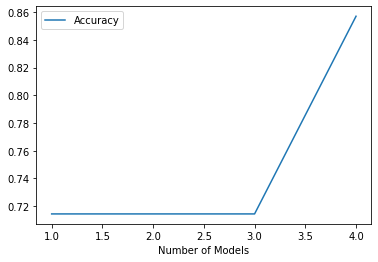

In [ ]:
#Boosting
print('\nBoosting:')
dfig = pd.DataFrame()
model = GradientBoostingClassifier(n_estimators=100)
for n in range(1, 5):
    print('Model:', n)
    accuracy, X_test, y_test = run(model)
    #Improve accuracy
    a_row = pd.Series([n, accuracy])
    row_dff = pd.DataFrame([a_row])
    dfig = pd.concat([row_dff, dfig], ignore_index=False)

dfig.columns = ['Number of Models', 'Accuracy']
dfig.sort_values(ascending=True, inplace=True, by=['Number of Models'])
dfig.plot.line(x='Number of Models', y='Accuracy')
dfig.head()